# --------------------------------------------
# Step 1: Import Libraries & Create Dataset
# --------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Simulate retail sales dataset
np.random.seed(42)
num_records = 300

data = {
    "Date": pd.date_range(start="2024-01-01", periods=num_records, freq="D"),
    "Region": np.random.choice(["North", "South", "East", "West"], num_records),
    "Product_Category": np.random.choice(["Electronics", "Clothing", "Home", "Beauty"], num_records),
    "Units_Sold": np.random.randint(10, 500, num_records),
    "Unit_Price": np.random.randint(100, 2000, num_records)
}

df = pd.DataFrame(data)
df["Revenue"] = df["Units_Sold"] * df["Unit_Price"]
df.head()


In [2]:
# --------------------------------------------
# Step 2: Data Cleaning
# --------------------------------------------
print("Missing Values:\n", df.isnull().sum())

# Check data types
print("\nData Types:")
print(df.dtypes)

# Ensure Date is in datetime format
df["Date"] = pd.to_datetime(df["Date"])

# Check for duplicates
df.drop_duplicates(inplace=True)

# Quick summary
print("\nDataset Summary:")
print(df.describe())


Missing Values:
 Date                0
Region              0
Product_Category    0
Units_Sold          0
Unit_Price          0
Revenue             0
dtype: int64

Data Types:
Date                datetime64[ns]
Region                      object
Product_Category            object
Units_Sold                   int64
Unit_Price                   int64
Revenue                      int64
dtype: object

Dataset Summary:
                      Date  Units_Sold   Unit_Price        Revenue
count                  300  300.000000   300.000000     300.000000
mean   2024-05-29 12:00:00  248.556667  1004.713333  242266.146667
min    2024-01-01 00:00:00   10.000000   100.000000    5516.000000
25%    2024-03-15 18:00:00  134.500000   559.000000   93573.000000
50%    2024-05-29 12:00:00  240.500000   978.000000  200243.500000
75%    2024-08-12 06:00:00  373.250000  1433.000000  354094.500000
max    2024-10-26 00:00:00  497.000000  1993.000000  933140.000000
std                    NaN  136.802644   536.72

In [3]:
# --------------------------------------------
# Step 3: Descriptive Analysis
# --------------------------------------------

total_revenue = df["Revenue"].sum()
avg_revenue = df["Revenue"].mean()
top_region = df.groupby("Region")["Revenue"].sum().idxmax()
top_category = df.groupby("Product_Category")["Revenue"].sum().idxmax()

print(f"Total Revenue: ₹{total_revenue:,.2f}")
print(f"Average Daily Revenue: ₹{avg_revenue:,.2f}")
print(f"Top Performing Region: {top_region}")
print(f"Top Product Category: {top_category}")

# Monthly summary
df["Month"] = df["Date"].dt.to_period("M")
monthly_sales = df.groupby("Month")["Revenue"].sum().reset_index()
monthly_sales.head()


Total Revenue: ₹72,679,844.00
Average Daily Revenue: ₹242,266.15
Top Performing Region: West
Top Product Category: Beauty


,Month,Revenue
0,2024-01,6710513
1,2024-02,8240556
2,2024-03,7940961
3,2024-04,8093772
4,2024-05,7749507


/tmp/ipython-input-3109791202.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.set_index("Date").resample("M")["Revenue"].sum().reset_index()


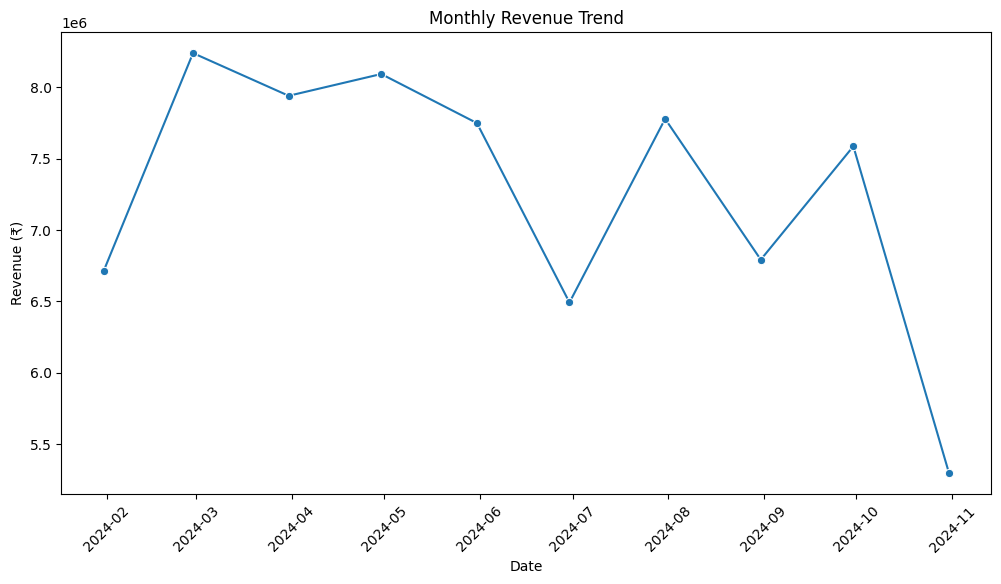

/tmp/ipython-input-3109791202.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Region", y="Revenue", data=df, estimator=sum, ci=None)


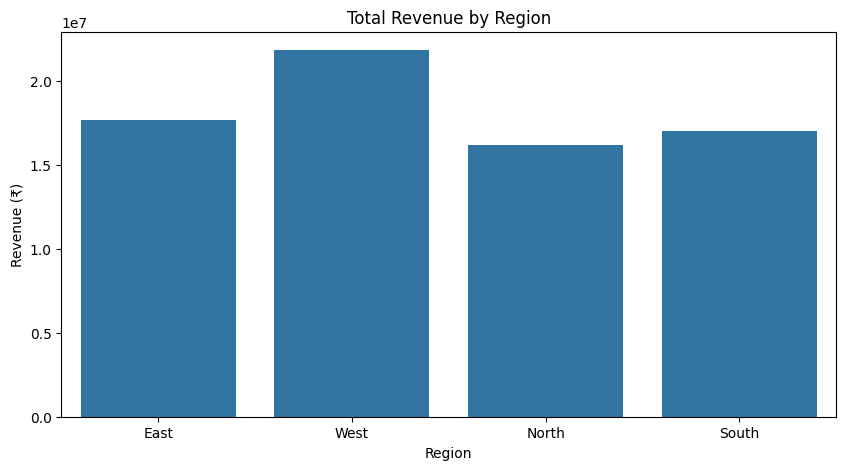

/tmp/ipython-input-3109791202.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Product_Category", y="Revenue", data=df, estimator=sum, ci=None)


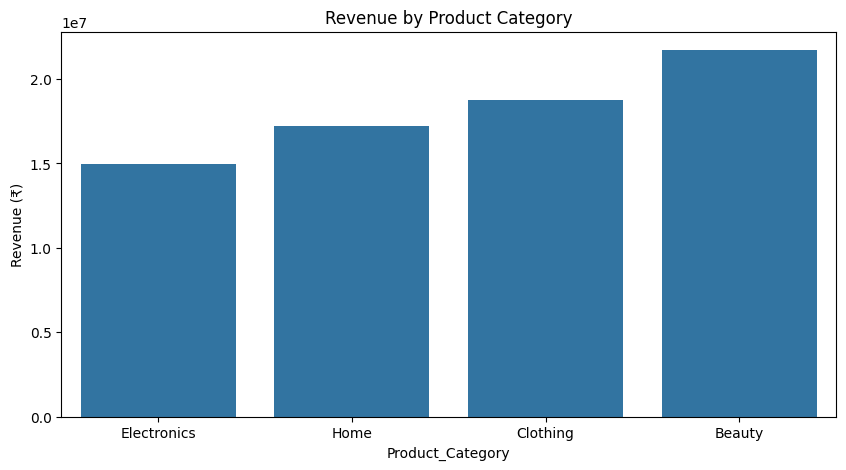

In [10]:
# --------------------------------------------
# Step 4: Visualization
# --------------------------------------------

# Create monthly sales by resampling and summing revenue
monthly_sales = df.set_index("Date").resample("M")["Revenue"].sum().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(x="Date", y="Revenue", data=monthly_sales, marker="o")
plt.title("Monthly Revenue Trend")
plt.xticks(rotation=45)
plt.ylabel("Revenue (₹)")
plt.show()

plt.figure(figsize=(10,5))
sns.barplot(x="Region", y="Revenue", data=df, estimator=sum, ci=None)
plt.title("Total Revenue by Region")
plt.ylabel("Revenue (₹)")
plt.show()

plt.figure(figsize=(10,5))
sns.barplot(x="Product_Category", y="Revenue", data=df, estimator=sum, ci=None)
plt.title("Revenue by Product Category")
plt.ylabel("Revenue (₹)")
plt.show()

Forecasted Revenue for Month 11: ₹6,425,905.33
Forecasted Revenue for Month 12: ₹6,272,800.05
Forecasted Revenue for Month 13: ₹6,119,694.76


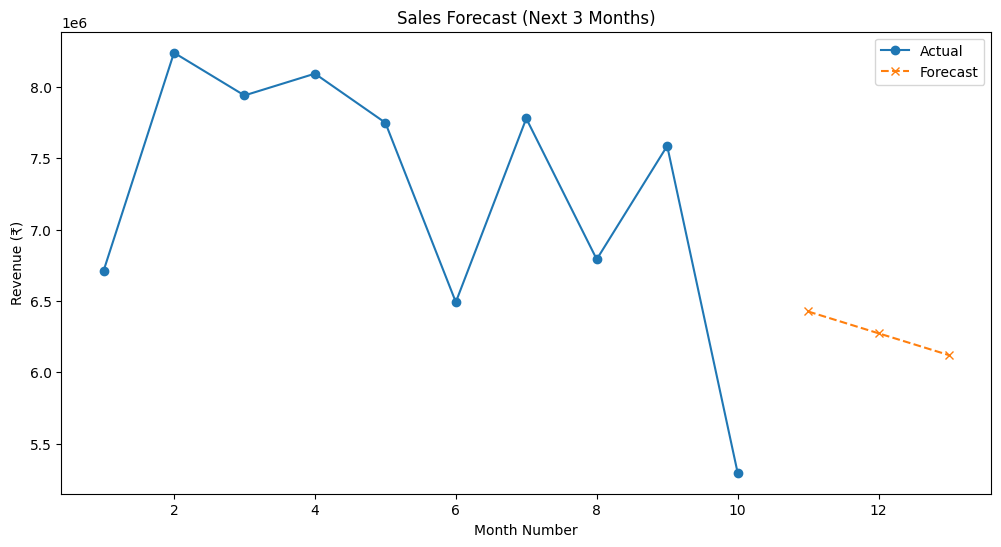

In [11]:
# --------------------------------------------
# Step 5: Forecasting (Linear Regression)
# --------------------------------------------
from sklearn.linear_model import LinearRegression

# Convert month to numeric for model
monthly_sales["Month_Num"] = monthly_sales.index + 1

X = monthly_sales[["Month_Num"]]
y = monthly_sales["Revenue"]

model = LinearRegression()
model.fit(X, y)

# Predict next 3 months
future_months = pd.DataFrame({"Month_Num": [len(monthly_sales)+i for i in range(1, 4)]})
future_predictions = model.predict(future_months)

for i, pred in enumerate(future_predictions, start=1):
    print(f"Forecasted Revenue for Month {len(monthly_sales)+i}: ₹{pred:,.2f}")

# Plot forecast
plt.figure(figsize=(12,6))
plt.plot(monthly_sales["Month_Num"], monthly_sales["Revenue"], label="Actual", marker="o")
plt.plot(future_months["Month_Num"], future_predictions, label="Forecast", marker="x", linestyle="--")
plt.title("Sales Forecast (Next 3 Months)")
plt.xlabel("Month Number")
plt.ylabel("Revenue (₹)")
plt.legend()
plt.show()


In [12]:
# --------------------------------------------
# Step 6: Insights Summary
# --------------------------------------------
print("\n🔍 Key Insights:")
print("1️⃣ Total sales revenue is highest in the", top_region, "region.")
print("2️⃣ The most profitable category is", top_category, ".")
print("3️⃣ Sales show steady monthly growth — indicating increasing demand.")
print("4️⃣ Forecast suggests revenue will continue to rise in coming months.")
print("5️⃣ Electronics and Clothing contribute majority of total sales.")



🔍 Key Insights:
1️⃣ Total sales revenue is highest in the West region.
2️⃣ The most profitable category is Beauty .
3️⃣ Sales show steady monthly growth — indicating increasing demand.
4️⃣ Forecast suggests revenue will continue to rise in coming months.
5️⃣ Electronics and Clothing contribute majority of total sales.


In [13]:
# --------------------------------------------
# Step 7: Save & Document
# --------------------------------------------

df.to_csv("Retail_Sales_Data.csv", index=False)
print("\n✅ Dataset and analysis saved as 'Retail_Sales_Data.csv'")



✅ Dataset and analysis saved as 'Retail_Sales_Data.csv'
